### Property Loans

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
df = pd.read_csv(r'C:\Users\hhamadeh\Documents\Datasets\Loan Predictions\train.csv')
df.shape

(614, 13)

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# Determine how many nulls there are for each feature
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### One of the few non-numerical features of interest is 'Property Area'. Let's see what the spread is:

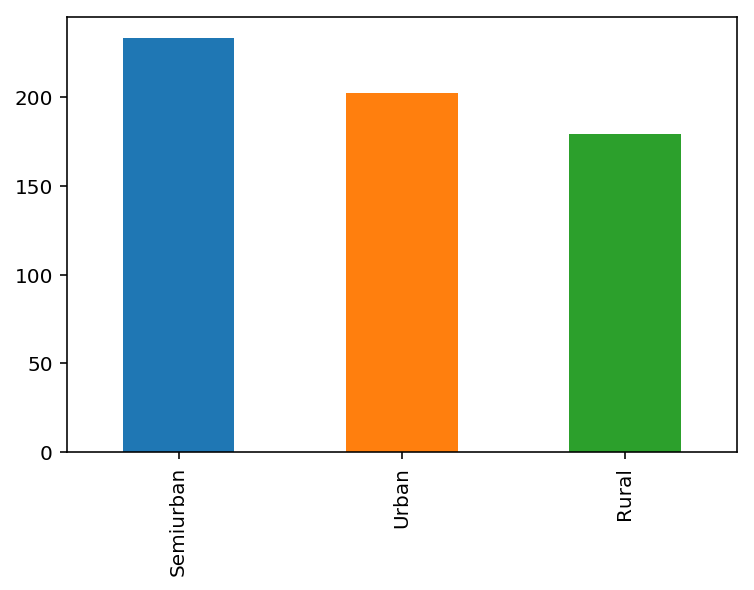

In [27]:
pa = df['Property_Area'].value_counts()

pa.plot(kind='bar', x='Property_Area')

### Let's see what the distribution of Application Income looks like:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


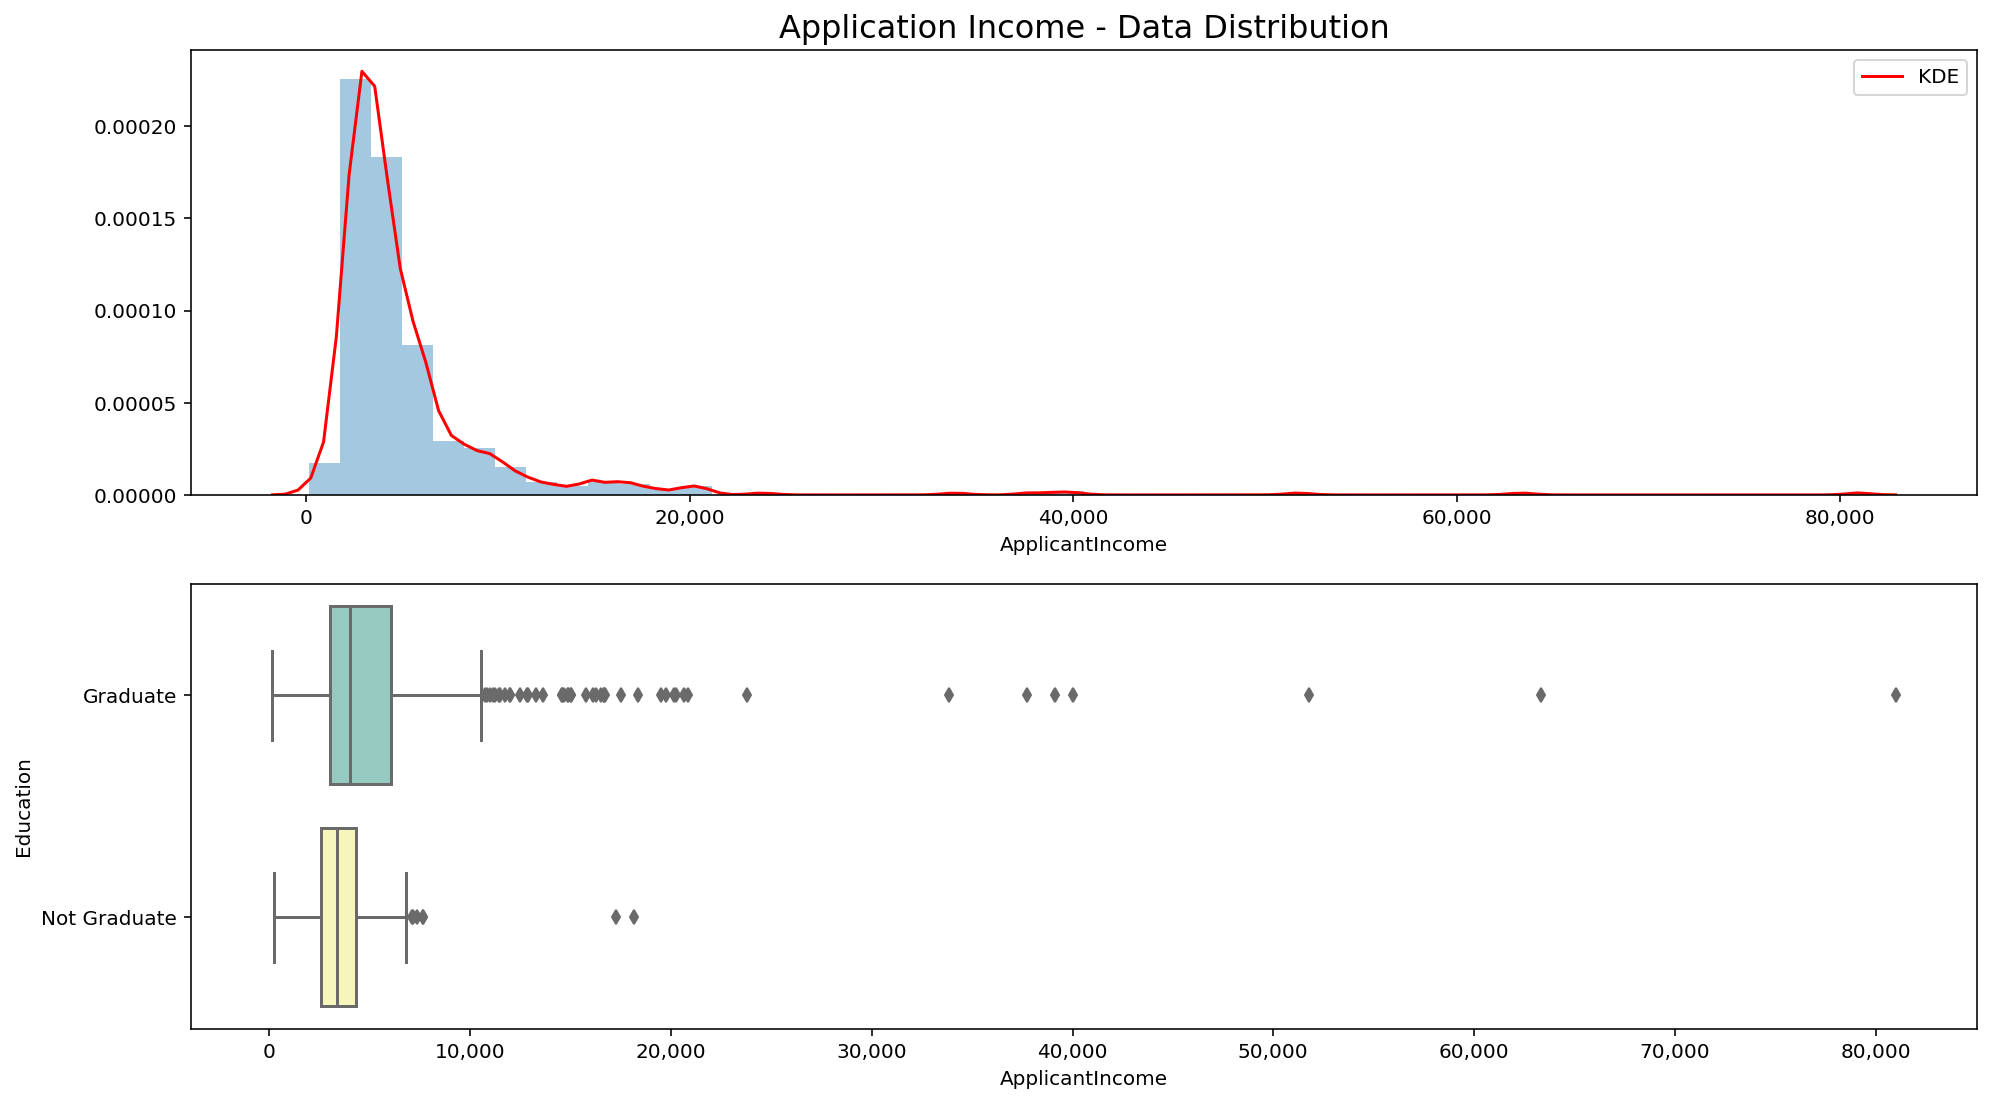

In [80]:
# Create subplots since it looks nicer :-)
fig, ax = plt.subplots(2, 1, figsize=(16, 9), sharex=False)

k = sns.distplot(df['ApplicantIncome'], kde=True, rug=False, vertical=False, kde_kws={'color' : 'r', 'label' : 'KDE'},
                ax=ax[0]).set_title('Application Income - Data Distribution', size=16)
b = sns.boxplot(x=df['ApplicantIncome'], y=df['Education'], palette='Set3',
               ax=ax[1])

for i in range(2):
    ax[i].set_xticklabels(['{:,}'.format(int(x)) for x in ax[i].get_xticks().tolist()])

#### Since our data had a high deviation, education level may have been a contributing factor. However this is not the case. Graduates have a very large income distribution compared to non-graduates.

### Now let's see what the distribution of Loan Amount looks like:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


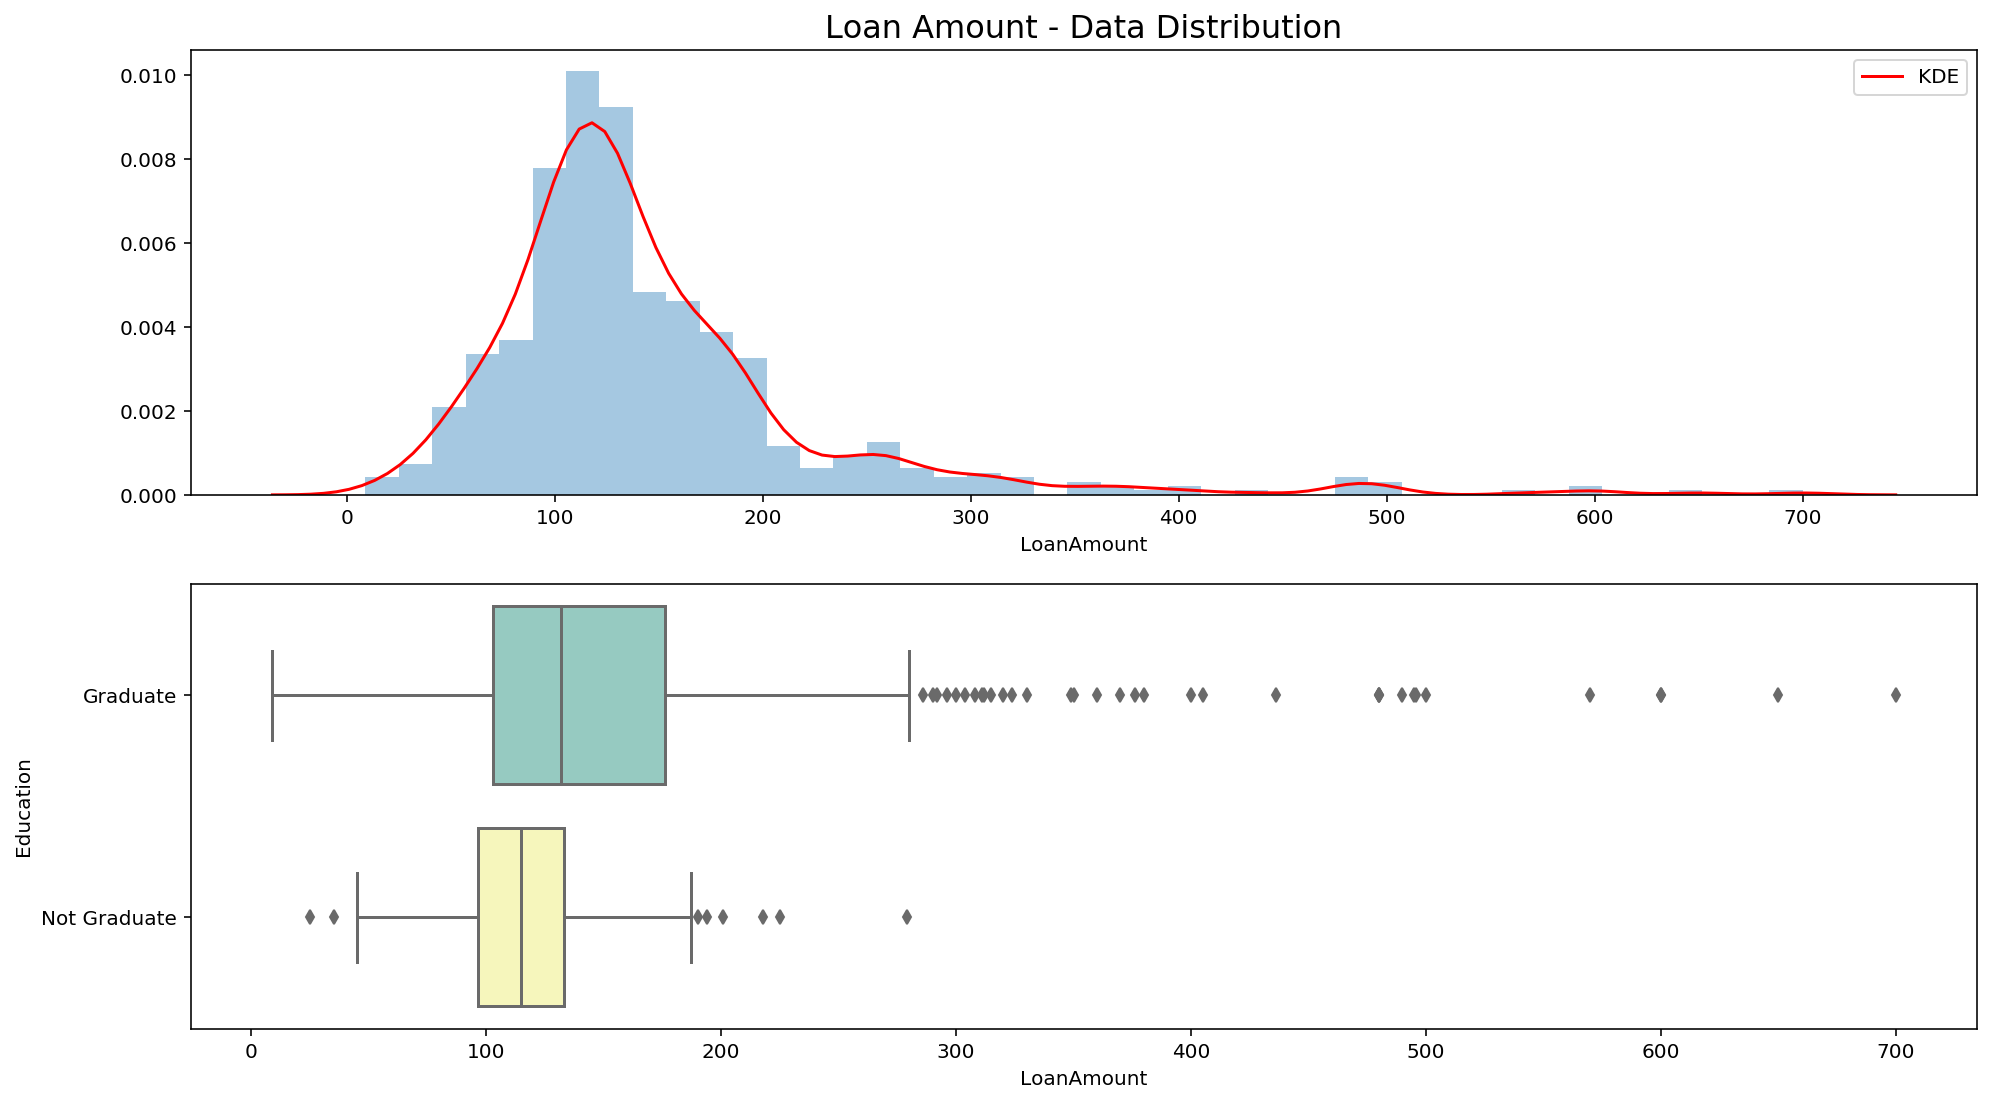

In [79]:
# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(16, 9), sharex=False)

k = sns.distplot(df['LoanAmount'].loc[~df['LoanAmount'].isnull()], kde=True, rug=False, vertical=False, kde_kws={'color' : 'r', 'label' : 'KDE'},
                ax=ax[0]).set_title('Loan Amount - Data Distribution', size=16)
b = sns.boxplot(df['LoanAmount'].loc[~df['LoanAmount'].isnull()], y=df['Education'], palette='Set3',
               ax=ax[1])

for i in range(2):
    ax[i].set_xticklabels(['{:,}'.format(int(x)) for x in ax[i].get_xticks().tolist()])

In [81]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [91]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [117]:
df['Credit_History'].loc[df['Credit_History'].isnull()].shape

(50,)

In [254]:
# Count the number of good (1) and bad (0) credit evaluations
temp1 = df['Credit_History'].value_counts(ascending=True)

creditHistory = pd.DataFrame({'Score' : [0, 1], 'Count' : temp1})
creditHistory

,Score,Count
0.0,0,89
1.0,1,475


In [198]:
# Probability of getting a loan for each credit history class
# Since the X axis contains 'Y' or 'N' for Loan Status, we want to map them to 1 and 0 (so we can calculate the mean)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

loanState = pd.DataFrame(temp2.to_records())
loanState

,Credit_History,Loan_Status
0,0.0,0.078652
1,1.0,0.795789


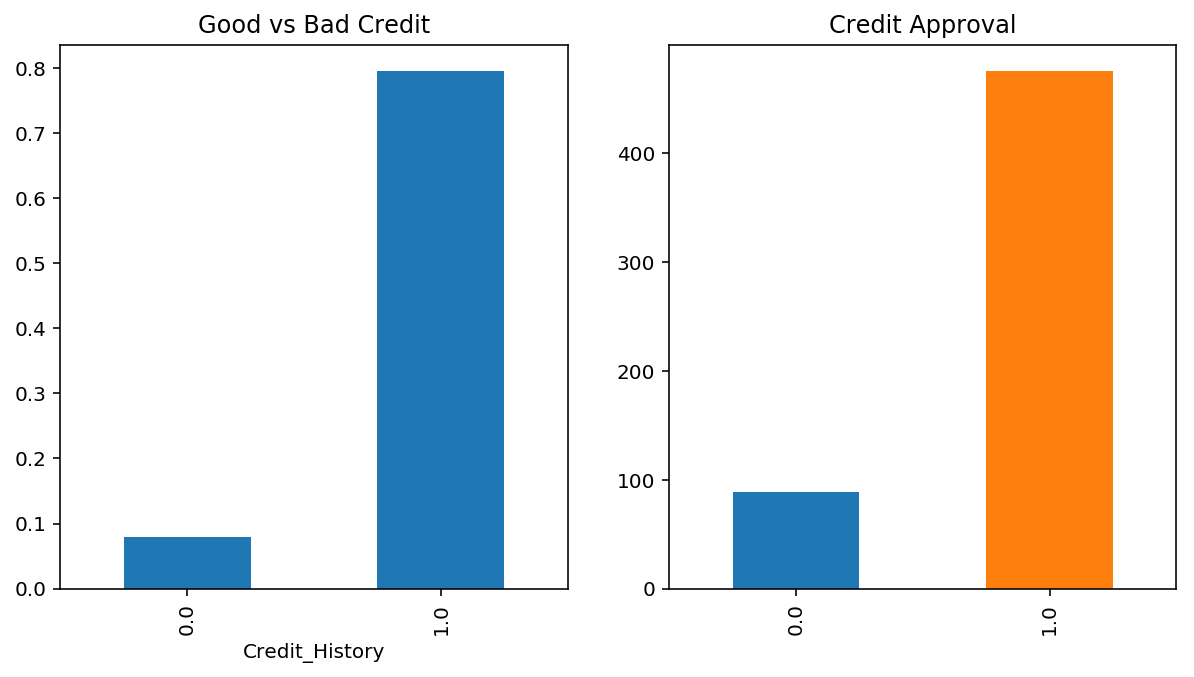

In [266]:
# Create subplots

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=False)

t1 = loanState.plot(ax=ax[0], kind='bar', x='Credit_History', title='Good vs Bad Credit', legend=False)
t2 = df['Credit_History'].value_counts(ascending=True).plot(ax=ax[1], kind='bar', x='Count', title='Credit Approval')


### Loans are 8x more likely for someone with good credit.

In [269]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [270]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [272]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [273]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 81.967%
